<a href="https://colab.research.google.com/github/anusha270/PRODIGY_ML_2/blob/main/Customer_purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

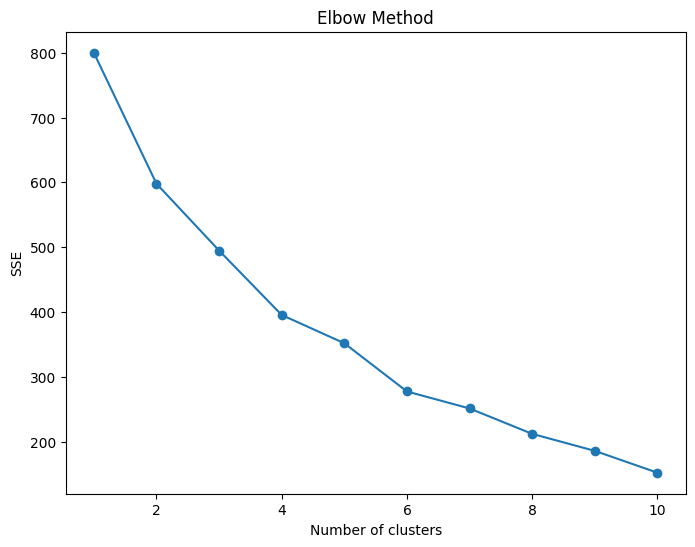

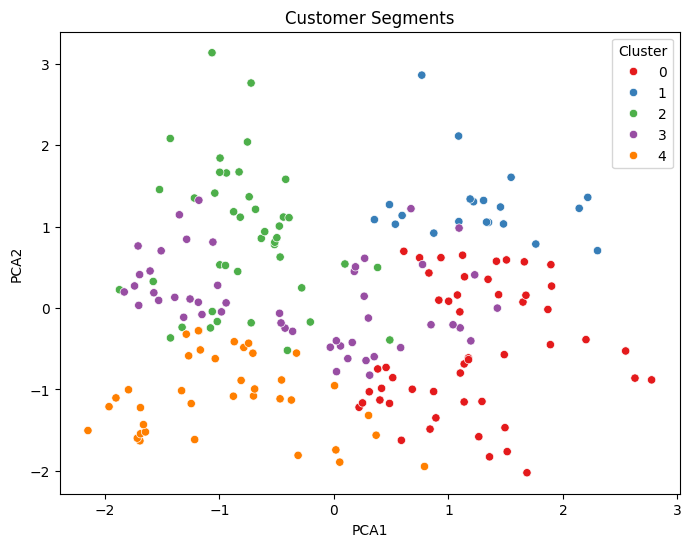

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.490196  56.470588           46.098039               39.313725
1        0.000000  39.500000           85.150000               14.050000
2        0.000000  28.690476           60.904762               70.238095
3        1.000000  37.897959           82.122449               54.448980
4        1.000000  27.315789           38.842105               56.210526


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

# Step 2: Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')  # Make sure to upload the dataset

# Step 3: Data Preprocessing
# Drop irrelevant columns
data = data.drop(['CustomerID'], axis=1)

# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Determine the optimal number of clusters using the Elbow method
sse = []  # List to store the sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Step 5: Apply K-means clustering (assuming 5 clusters based on the Elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Step 6: Visualize the clusters using PCA
pca = PCA(2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('Customer Segments')
plt.show()

# Step 7: Analyze clusters (view the mean of features in each cluster)
print(data.groupby('Cluster').mean())

# Step 8: Save the results to a CSV
data.to_csv('customer_segments.csv', index=False)
files.download('customer_segments.csv')
